## Model Building and Predicting House Price of Unseen Data

#### Things to do
- Choose relevent columns
- Get dummy data if any categoral columns
- Scale the columns using Standard Scaler
- Do train test split
- Multiple linear regression
- Lasso regression
- Decision Tree Regressor
- Random forest Regressor
- Tune hyperparameters  using Grid Search CV
- Predict on test set
- Predict on unseen data from different year

In [386]:
#importing models
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
from matplotlib import rcParams
#importing sklearn models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [185]:
# 2019 usa cleaned data for machine learning
path=os.path.join('output_census', 'usa_2019_ml1.csv')
usa_2019=pd.read_csv(path)

In [186]:
usa_2019=usa_2019[[ 'City','House Value','Monthly Owner Cost','Per Capita Income',
                   'Lng','Household Income','College Rate','Lat',
                    'Personal Transport Rate','High School Rate','Median Age',
                    'Public Transport Rate','Population']]

In [187]:
#seting city as a index
usa_2019.set_index('City', inplace=True)

In [188]:
#index andcolumns of our data sets
index=usa_2019.index
columns=usa_2019.columns
print(index)
print(columns)

Index(['Aguada', 'Aguadilla', 'Maricao', 'Anasco', 'Arecibo', 'Bajadero',
       'Barceloneta', 'Boqueron', 'Cabo Rojo', 'Camuy',
       ...
       'Kake', 'Petersburg', 'Sitka', 'Skagway', 'Ketchikan', 'Thorne Bay',
       'Craig', 'Klawock', 'Metlakatla', 'Wrangell'],
      dtype='object', name='City', length=26222)
Index(['House Value', 'Monthly Owner Cost', 'Per Capita Income', 'Lng',
       'Household Income', 'College Rate', 'Lat', 'Personal Transport Rate',
       'High School Rate', 'Median Age', 'Public Transport Rate',
       'Population'],
      dtype='object')


#### Prepare a feature matrix (X) and response (y)  for scikit-learn.

In [189]:
# create feature matrix (X)
#selecting all columns except 'House Value'
X=usa_2019.drop('House Value', axis=1) 

# create response vector (y)
##selecting 'House Value'
y=usa_2019['House Value'].values  

#### Scaling using standard scaler on feature matrix (X) 

In [190]:
#Different columns have differnt scale so standrazied it 
#features scaling using standard scaler on x only
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_X=std_scaler.fit_transform(X)

In [191]:
#shape of the X and y
print(scaled_X.shape)
print(y.shape)

(26222, 11)
(26222,)


#### Splitting data in train and test set

In [192]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
#Also using train_index and test_index to get train and test data index 
X_train, X_test, y_train, y_test,train_index, test_index = train_test_split(
                               scaled_X, y,index, test_size=0.2, random_state=42)

In [193]:
print(f'Shape of X_train={X_train.shape}')
print(f'Shape of X_test={X_test.shape}')
print(f'Shape of y_train={y_train.shape}')
print(f'Shape of X_test={y_test.shape}')

Shape of X_train=(20977, 11)
Shape of X_test=(5245, 11)
Shape of y_train=(20977,)
Shape of X_test=(5245,)


### Evaluation Metric

To evaluate a model, we also need an **evaluation metric:**

- A numeric calculation used to **quantify** the performance of a model.
- The appropriate metric depends on the **goals** of your problem.

The most common choices for regression problems are:

- **R-squared**: The percentage of variation explained by the model (a "reward function," as higher is better).
- **Mean squared error**: The average squared distance between the prediction and the correct answer (a "loss function," as lower is better).
- **Mean absolute error**: The average absolute distance between the prediction and the correct answer (a "loss function," as lower is better).

In this case, we'll use mean squared error, R2, and mean absolute error because it is more interpretable in a predictive context.

## Linear Regression

In [194]:
#using linear regression
# Make a linear regression instance
lr=LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(X_train, y_train)


LinearRegression()

In [195]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr.score(X_train, y_train)}')
print(f'R2 Score of testing  set  {lr.score(X_test, y_test)}')

R2 Score of training set 0.8348136946474434
R2 Score of testing  set  0.8384201779423417


#### Create a cross-valiation with five folds.
-  Cross valiation allows the training set into distinct subsets called folds.
- A model is trained using k-1 of the folds as training data

In [196]:
cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

array([-44911.89270734, -44921.806391  , -45232.50037804, -45601.30936043,
       -45022.84434751])

In [197]:
lr_r2=np.mean(cross_val_score(lr, X_train, y_train, cv=5))
print(f'The R2 of Linear Regression is {lr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_mse=np.mean(cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_rmse=np.sqrt(-(lr_mse))
print(f'The mean squared error of Linear Regression is {lr_rmse}')

#mean absolute error
lr_mae=np.mean(cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_mae=(-(lr_mae))
print(f'The mean absolute error of Linear Regression is {lr_mae}')

The R2 of Linear Regression is 0.8344038087752625
The mean squared error of Linear Regression is 76566.0150072991
The mean absolute error of Linear Regression is 45138.070636862445


## Ridge Regression

In [198]:
#using ridge regression(ridge make some features going to near zero)
#alpha=0 no regularization( all features are used)
# Make a ridge regression instance
lr_r=Ridge()
lr_r.fit(X_train, y_train)


Ridge()

In [199]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_r.score(X_train, y_train)}')
print(f'R2 Score of testing set  {lr_r.score(X_test, y_test)}')

R2 Score of training set 0.8348136888557021
R2 Score of testing set  0.8384208580371466


#### Create a cross-valiation with five folds.

In [200]:
cross_val_score(lr_r, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-44685.20647238, -45133.74574876, -45614.98611938])

In [201]:
lr_r_r2=np.mean(cross_val_score(lr_r, X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression is {lr_r_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_r_mse=np.mean(cross_val_score(lr_r, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_r_rmse=np.sqrt(-(lr_l_mse))
print(f'The mean squared error of Ridge Regression is {lr_r_rmse}')

#mean absolute error
lr_r_mae=np.mean(cross_val_score(lr_r, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_r_mae=(-(lr_r_mae))
print(f'The mean absolute error of Ridge Regression is {lr_r_mae}')

The R2 of Ridge Regression is 0.8344040123718409
The mean squared error of Ridge Regression is 79054.84186306574
The mean absolute error of Ridge Regression is 45136.38681306372


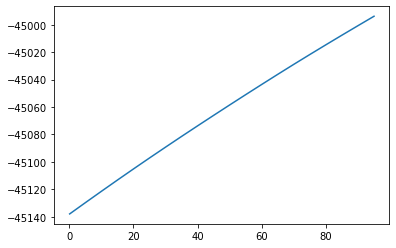

In [202]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,1000,50):
    alpha.append(i/10)
    lrr=Ridge(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrr, X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [203]:
#choosing the best alpha (look figure where alpha start to saturate)
lrr=Ridge(alpha=10)
lrr.fit(X_train, y_train)


Ridge(alpha=10)

In [204]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 40 {lrr.score(X_train, y_train)}')
print(f'R2 Score of testing set with alpha 40 {lrr.score(X_test, y_test)}')

R2 Score of training set with alpha 40 0.8348131188967053
R2 Score of testing set with alpha 40 0.8384264333703393


#### Create a cross-valiation with five folds.

In [205]:
cross_val_score(lr_r, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-44685.20647238, -45133.74574876, -45614.98611938])

In [206]:
lrr_r2=np.mean(cross_val_score(lrr, X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression with alpha 10 is {lrr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrr_mse=np.mean(cross_val_score(lr_r, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrr_rmse=np.sqrt(-(lrr_mse))
print(f'The mean squared error of Ridge Regression with alpha 10 is {lrr_rmse}')

#mean absolute error
lrr_mae=np.mean(cross_val_score(lr_r, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrr_mae=(-(lrr_mae))
print(f'The mean absolute error of Ridge Regression with alpha 10 is {lrr_mae}')

The R2 of Ridge Regression with alpha 10 is 0.8344050240098314
The mean squared error of Ridge Regression with alpha 10 is 76565.98622638812
The mean absolute error of Ridge Regression with alpha 10 is 45136.38681306372


## Laso Regression

In [207]:
#using lassoregression(lasso make some features going to exactly zero)
#alpha=0 no regularization( all features are used)
# Make a lasso regression instance
lr_l=Lasso()
lr_l.fit(X_train, y_train)


Lasso()

In [208]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_l.score(X_train, y_train)}')
print(f'R2 Score of testing set  {lr_l.score(X_test, y_test)}')

R2 Score of training set 0.8348136937793293
R2 Score of testing set  0.8384200863671196


#### Create a cross-valiation with five folds.

In [209]:
cross_val_score(lr_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-44687.15214434, -45135.10404306, -45616.02985106])

In [210]:
lr_l_r2=np.mean(cross_val_score(lr_l, X_train, y_train, cv=5))
print(f'The R2 of Lasso Regression is {lr_l_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_l_mse=np.mean(cross_val_score(lr_l, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_l_rmse=np.sqrt(-(lr_l_mse))
print(f'The mean squared error of Lasso Regression is {lr_l_rmse}')

#mean absolute error
lr_l_mae=np.mean(cross_val_score(lr_l, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_l_mae=(-(lr_l_mae))
print(f'The mean absolute error of Lasso Regression is {lr_l_mae}')

The R2 of Lasso Regression is 0.8344038234703028
The mean squared error of Lasso Regression is 76566.0155244916
The mean absolute error of Lasso Regression is 45137.45103759263


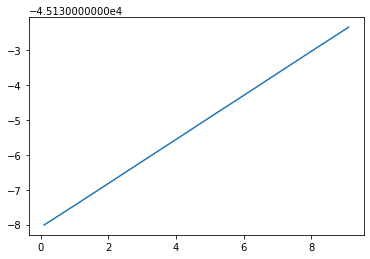

In [211]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,100,10):
    alpha.append(i/10)
    lrl=Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrl, X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [212]:
#choosing the best alpha
lrl=Lasso(alpha=10)
lrl.fit(X_train, y_train)


Lasso(alpha=10)

In [213]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 10 {lrl.score(X_train, y_train)}')
print(f'R2 Score of testing set with alpha 10 {lrl.score(X_test, y_test)}')

R2 Score of training set with alpha 10 0.8348136046904666
R2 Score of testing set with alpha 10 0.8384193251104615


#### Create a cross-valiation with five folds.

In [214]:
cross_val_score(lr_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-44687.15214434, -45135.10404306, -45616.02985106])

In [215]:
lrl_r2=np.mean(cross_val_score(lrl, X_train, y_train, cv=5))
print(f'The R2 of Lasso Regression with alpha 10 is {lrl_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrl_mse=np.mean(cross_val_score(lr_l, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrl_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Lasso Regression with alpha 10 is {lrl_rmse}')

#mean absolute error
lrl_mae=np.mean(cross_val_score(lr_l, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrl_mae=(-(lrl_mae))
print(f'The mean absolute error of Lasso Regressionwith alpha 10 is {lrl_mae}')

The R2 of Lasso Regression with alpha 10 is 0.8344038035794492
The mean squared error of Lasso Regression with alpha 10 is 76566.0155244916
The mean absolute error of Lasso Regressionwith alpha 10 is 45137.45103759263


## Support Vector Machine(SVM) Regression

In [216]:
# Make a svm regression instance
svm=LinearSVR(epsilon=1.5)
svm.fit(X_train, y_train)


LinearSVR(epsilon=1.5)

In [217]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {svm.score(X_train, y_train)}')
print(f'R2 Score of testing set  {svm.score(X_test, y_test)}')

R2 Score of training set -0.9955034068217965
R2 Score of testing set  -0.9806359513953882


#### Create a cross-valiation with five folds.

In [218]:
cross_val_score(svm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-192921.14234183, -195208.7184979 , -194981.00176885])

In [219]:
svm_r2=np.mean(cross_val_score(svm, X_train, y_train, cv=5))
print(f'The R2 of svm Regression is {svm_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
svm_mse=np.mean(cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
svm_rmse=np.sqrt(-(svm_mse))
print(f'The mean squared error of svm Regression is {svm_rmse}')

#mean absolute error
svm_mae=np.mean(cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
svm_mae=(-(svm_mae))
print(f'The mean absolute error of svm Regression is {lr_r_mae}')

The R2 of svm Regression is -1.0411362918636868
The mean squared error of svm Regression is 268680.19266335305
The mean absolute error of svm Regression is 45136.38681306372


## Decision Tree

In [220]:
# Make a decision tree instance
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [221]:
#Printing the score of test and train set
print(f'R2 Score of training set {dt.score(X_train, y_train)}')
print(f'R2 Score of testing set  {dt.score(X_test, y_test)}')

R2 Score of training set 1.0
R2 Score of testing set  0.8643444188290956


#### Create a cross-valiation with five folds.

In [222]:
cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-37550.83840984, -37550.45952517, -39050.15918192])

In [223]:
dt_r2=np.mean(cross_val_score(dt, X_train, y_train, cv=5))
print(f'The R2 of Decision Tree Regressor is {dt_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
dt_mse=np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
dt_rmse=np.sqrt(-(dt_mse))
print(f'The mean squared error of Decision Tree Regressor is {dt_rmse}')

#mean absolute error
dt_mae=np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
dt_mae=(-(dt_mae))
print(f'The mean absolute error of Decision Tree Regressor is {dt_mae}')

The R2 of Decision Tree Regressor is 0.8458400303167363
The mean squared error of Decision Tree Regressor is 72757.52547316562
The mean absolute error of Decision Tree Regressor is 38130.52580004113


### Tuning hyperparamaters  using Grid Search CV

In [224]:
parameters = {
              'max_depth':[6, 8,12],
              'min_samples_leaf':range(1,5)}
gs_dt=GridSearchCV(dt, param_grid=parameters, 
                    cv=3, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 12],
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [225]:
#Best parameters
gs_dt.best_params_

{'max_depth': 8, 'min_samples_leaf': 2}

In [226]:
#best estimator
dt_b=gs_dt.best_estimator_
dt_b

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2)

In [227]:
#Printing the score of test and train set
dt_tr=dt_b.score(X_train, y_train)
dt_te=dt_b.score(X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {dt_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {dt_te}')

R2 Score of training set after hyperpar tuining 0.9435113710433504
R2 Score of testing set after hyperpar tuining  0.8871802071115592


## Random Forest

In [228]:
# Make a Random forest instance
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [229]:
#Printing the score of test and train set
print(f'R2 Score of training set {rf.score(X_train, y_train)}')
print(f'R2 Score of testing set {rf.score(X_test, y_test)}')

R2 Score of training set 0.9895890888899962
R2 Score of testing set 0.9278046315385401


#### Create a cross-valiation with five folds.

In [230]:
cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-26966.87480909, -26803.01240704, -27272.55154462])

In [231]:
rf_r2=np.mean(cross_val_score(rf, X_train, y_train, cv=5))
print(f'The R2 of Random Forest Regressor is {rf_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
rf_mse=np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
rf_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Random Forest Regressor is {rf_rmse}')

#mean absolute error
rf_mae=np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
rf_mae=(-(rf_mae))
print(f'The mean absolute error of Random Forest Regressor is {rf_mae}')

The R2 of Random Forest Regressor is 0.9227754272023171
The mean squared error of Random Forest Regressor is 76566.0155244916
The mean absolute error of Random Forest Regressor is 26835.862597588264


#### Tuning the hyperparameters using Grid Search CV

In [252]:
parameters = [{'n_estimators':[30,60,100],
              'max_features':[3,6]}]
              #,{'bootstrap':[False], 'n_estimators':[3,10,100],
              #'max_features':[4,6,8,10]}]
gs_rf=GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error',
                   cv=5, return_train_score=True)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [3, 6],
                          'n_estimators': [30, 60, 100]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [253]:
#Best parameters
gs_rf.best_params_

{'max_features': 6, 'n_estimators': 100}

In [254]:
#best estimator
rf_b=gs_rf.best_estimator_
rf_b

RandomForestRegressor(max_features=6)

In [255]:
#Printing the score of test and train set
rf_tr=rf_b.score(X_train, y_train)
rf_te=rf_b.score(X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {rf_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {rf_te}')

R2 Score of training set after hyperpar tuining 0.9898419759309446
R2 Score of testing set after hyperpar tuining  0.9279054179105644


In [256]:
#printing the evaluation scores
cvres=gs_rf.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print((-mean_score), params)

27834.66096788057 {'max_features': 3, 'n_estimators': 30}
27333.30221929696 {'max_features': 3, 'n_estimators': 60}
27188.57721914576 {'max_features': 3, 'n_estimators': 100}
27069.32713562721 {'max_features': 6, 'n_estimators': 30}
26836.926244556653 {'max_features': 6, 'n_estimators': 60}
26661.99785934695 {'max_features': 6, 'n_estimators': 100}


### Important scores of each columns

In [257]:
feature_importances=rf_b.feature_importances_
col=X.columns
sorted(zip(feature_importances, col), reverse=True)

[(0.5906623258021902, 'Monthly Owner Cost'),
 (0.1515640415109147, 'Per Capita Income'),
 (0.07885018158446899, 'Lng'),
 (0.06293240804799036, 'Household Income'),
 (0.0348711886089962, 'College Rate'),
 (0.018968908629669302, 'High School Rate'),
 (0.01690926399002532, 'Lat'),
 (0.015045609242558704, 'Personal Transport Rate'),
 (0.010811355342948739, 'Median Age'),
 (0.009711601549561568, 'Public Transport Rate'),
 (0.009673115690675846, 'Population')]

## Predicting on Test set

In [258]:
#Testing the model in test data
y_pred_lr=lr.predict(X_test)     #linear 
y_pred_lrl=lrl.predict(X_test)   #lasso
y_pred_lrr=lrr.predict(X_test)   #Ridge
y_pred_svm=svm.predict(X_test)   #svm
y_pred_dt=dt_b.predict(X_test)   #Dicision tree
y_pred_rf=rf_b.predict(X_test)   #Random forest

### Mean Absolute Error

In [259]:
#regression matrices-mean absolute error(give you the prediction error)
lin_mae_lr=mean_absolute_error(y_test, y_pred_lr)
print(f'The mean absoulte error of linear regression is {lin_mae_lr}')

lin_mae_lrl=mean_absolute_error(y_test, y_pred_lrl)
print(f'The mean absoulte error of lasso regression is {lin_mae_lrl}')

lin_mae_lrr=mean_absolute_error(y_test, y_pred_lrr)
print(f'The mean absoulte error of Ridge regression is {lin_mae_lrr}')

lin_mae_svm=mean_absolute_error(y_test, y_pred_svm)
print(f'The mean absoulte error of SVM regression is {lin_mae_svm}')

lin_mae_dt=mean_absolute_error(y_test, y_pred_dt)
print(f'The mean absoulte error of decision tree regression is {lin_mae_dt}')

lin_mae_rf=mean_absolute_error(y_test, y_pred_rf)
print(f'The mean absoulte error of random forest regression is {lin_mae_rf}')


The mean absoulte error of linear regression is 45391.5112780571
The mean absoulte error of lasso regression is 45384.6166684727
The mean absoulte error of Ridge regression is 45378.01510806348
The mean absoulte error of SVM regression is 190494.75612435187
The mean absoulte error of decision tree regression is 34290.56957689068
The mean absoulte error of random forest regression is 26995.017286939947


### Root Mean Squared Error

In [260]:
#regression matrices-mean squared error(give you the prediction error)
lin_mse_lr=mean_squared_error(y_test, y_pred_lr)
lin_rmse_lr=np.sqrt(lin_mse_lr)
print(f'The mean squared error of linear regression is {lin_rmse_lr}')

lin_mse_lrl=mean_squared_error(y_test, y_pred_lrl)
lin_rmse_lrl=np.sqrt(lin_mse_lrl)
print(f'The mean squared error of lasso regression is {lin_rmse_lrl}')

lin_mse_lrr=mean_squared_error(y_test, y_pred_lrr)
lin_rmse_lrr=np.sqrt(lin_mse_lrr)
print(f'The mean squared error of ridge regression is {lin_rmse_lrr}')

lin_mse_svm=mean_squared_error(y_test, y_pred_svm)
lin_rmse_svm=np.sqrt(lin_mse_svm)
print(f'The mean squared error of SVM regression is {lin_rmse_svm}')

lin_mse_dt=mean_squared_error(y_test, y_pred_dt)
lin_rmse_dt=np.sqrt(lin_mse_dt)
print(f'The mean squared error of decision tree regression is {lin_rmse_dt}')

lin_mse_rf=mean_squared_error(y_test, y_pred_rf)
lin_rmse_rf=np.sqrt(lin_mse_rf)
print(f'The mean squared error of random forest regression is {lin_rmse_rf}')

The mean squared error of linear regression is 77458.94583201356
The mean squared error of lasso regression is 77459.15024915677
The mean squared error of ridge regression is 77457.44643827128
The mean squared error of SVM regression is 271194.1695851578
The mean squared error of decision tree regression is 64724.79275358115
The mean squared error of random forest regression is 51740.34661723576


### Actual and predicted house rate --best model( RandomForest Regressor)

In [261]:
#Actual and predicated value of house using our best model
house_value=pd.DataFrame({'Actual House Value':y_test, 
                'Random Forest Predicted House Value':y_pred_rf,
                'Linear Reg Predicted House Value':y_pred_lr,
                'Lasso Reg Predicted House Value':y_pred_lrl,
                'Ridge Reg Predicted House Value':y_pred_lrr,       
                'Decesion Tree Predicted House Value':y_pred_dt,
                 'SVM Predicted House Value':y_pred_svm},index=test_index)
house_value

,Actual House Value,Random Forest Predicted House Value,Linear Reg Predicted House Value,Lasso Reg Predicted House Value,Ridge Reg Predicted House Value,Decesion Tree Predicted House Value,SVM Predicted House Value
City,,,,,,,
Bristol,179900.0,160204.0,126194.356363,126273.159845,126366.212912,158219.545455,20973.937137
Milford,230500.0,228049.0,244240.716792,244259.499574,244285.287559,252072.431078,20921.418743
Mukwonago,293900.0,268545.0,291680.687706,291732.855639,291782.752040,288200.000000,20869.607597
Purvis,157200.0,146429.0,139587.330258,139620.046996,139713.005427,140550.727449,20965.164363
Wilson,82100.0,75816.0,101869.162827,101890.825466,102003.980111,84646.820809,21315.360830
...,...,...,...,...,...,...,...
Hoodsport,174900.0,192189.0,221043.343631,220933.705584,220971.165486,154790.116279,21442.646907
Leicester,262000.0,231852.0,223904.421604,223960.539763,223928.399135,252072.431078,20914.482322
Whitewater,166400.0,148591.0,176584.679936,176642.876394,176503.506217,185289.811321,20980.709973


## Evaluation metrices of differnt models

In [262]:
evaluation_df=pd.DataFrame({'Linear Reg':[lr_r2,lin_mae_lr,lin_rmse_lr],
                           'Lasso Reg':[lrl_r2,lin_mae_lrl,lin_rmse_lrl],
                            'Ridge Reg':[lrr_r2,lin_mae_lrr,lin_rmse_lrr],
                            'SVM Reg':[svm_r2,lin_mae_svm,lin_rmse_svm],
                           'Decision Tree':[dt_tr,lin_mae_dt,lin_rmse_dt],
                            'Random Forest':[rf_tr,lin_mae_rf,lin_rmse_rf]}
                           ,index=['R2','Mean Absolute Error',
                                    'Root Mean Squared Error'])
evaluation_df

,Linear Reg,Lasso Reg,Ridge Reg,SVM Reg,Decision Tree,Random Forest
R2,0.834404,0.834404,0.834405,-1.041136,0.943511,0.989842
Mean Absolute Error,45391.511278,45384.616668,45378.015108,190494.756124,34290.569577,26995.017287
Root Mean Squared Error,77458.945832,77459.150249,77457.446438,271194.169585,64724.792754,51740.346617


In [384]:

confidence = 0.95
squared_errors = np.abs((y_pred_dt - y_test)) 
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([181.12002899, 189.14722904])

# Predecting the house value of 2017 census data from our best model- Random Forest

In [299]:
# 2017 usa cleaned data for machine learning
path_2017=os.path.join('output_census', 'usa_2017_ml.csv')
usa_17=pd.read_csv(path_2017)

In [300]:
#choosing only important columns
usa_2017=usa_17[[ 'City','House Value','Monthly Owner Cost','Per Capita Income','Lng',
 'Household Income','College Rate','Lat',
  'Personal Transport Rate','High School Rate','Median Age',
 'Public Transport Rate','Population']]

In [301]:
#seting city as a index
usa_2017.set_index('City', inplace=True)

#### Prepare a feature matrix (X) and response (y)  for scikit-learn.

In [302]:
# create feature matrix (X)
#selecting all columns except 'House Value'
X_2017=usa_2017.drop('House Value', axis=1) 

# create response vector (y)
##selecting 'House Value'
y_2017=usa_2017['House Value'].values  

#### Scaling using standard scaler on feature matrix (X) 

In [303]:
#Different columns have differnt scale so standrazied it 
#features scaling using standard scaler on x only
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_X_2017=std_scaler.fit_transform(X_2017)

In [304]:
#shape of the X and y
print(scaled_X_2017.shape)
print(y_2017.shape)

(26457, 11)
(26457,)


#### Predcting the house value using our best model Random Forest Regressor

In [305]:
y_pred=rf_b.predict(scaled_X_2017) 

In [306]:
#regression matrices-mean absolute error(give you the prediction error)
mae=mean_absolute_error(y_2017, y_pred)
print(f'The mean absoulte error of our best model for 2017 census data is {mae}')

#regression matrices-mean squared error(give you the prediction error)
mse=mean_squared_error(y_2017, y_pred)
rmse=np.sqrt(mse)
print(f'The mean squared error of our best model for 2017 census data is {rmse}')

The mean absoulte error of our best model for 2017 census data is 27912.769831046604
The mean squared error of our best model for 2017 census data is 46705.713099312314


In [308]:
#Actual and predicated value of house using our best model
house_value_2017=pd.DataFrame({'Actual House Value':y_2017, 
                'Random Forest Predicted House Value':y_pred},index=usa_2017.index)
house_value_2017

,Actual House Value,Random Forest Predicted House Value
City,,
Aguada,87300.0,94344.0
Aguadilla,122300.0,113254.0
Maricao,92700.0,83379.0
Anasco,90300.0,91833.0
Arecibo,97300.0,102184.0
...,...,...
Craig,225700.0,259284.0
Hydaburg,90700.0,89036.0
Klawock,160900.0,192595.0


## Plotting predected and actual house value

In [350]:
#setting background of figure 
plt.style.use('ggplot')

In [351]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

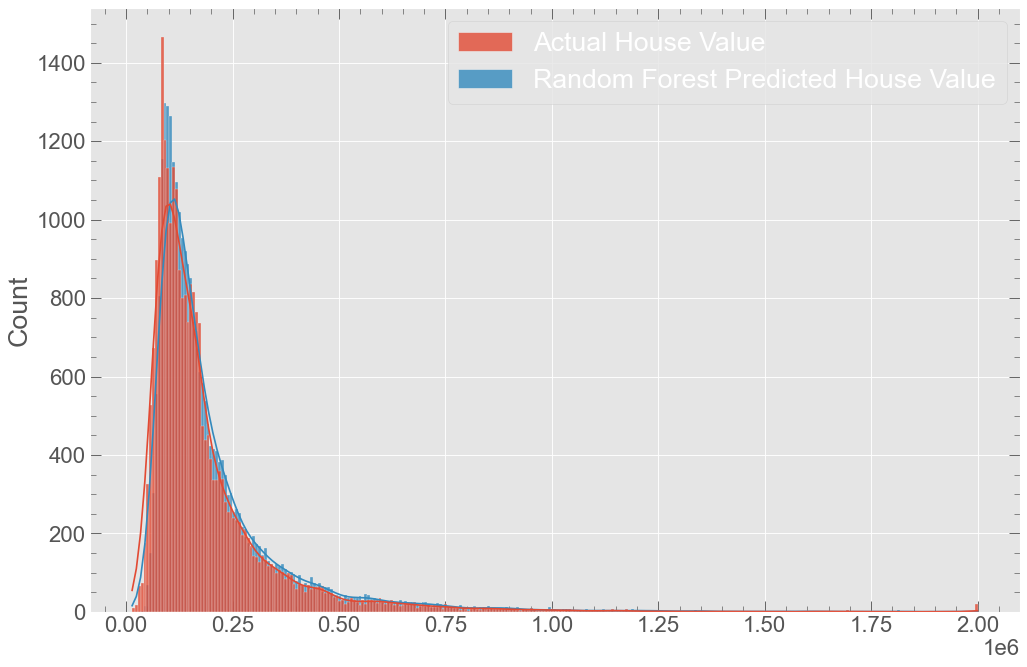

In [382]:

fig,ax=plt.subplots()
sns.histplot(data=house_value_2017,fill=True,
             kde=True,alpha=0.8,ax=ax)
plt.show()

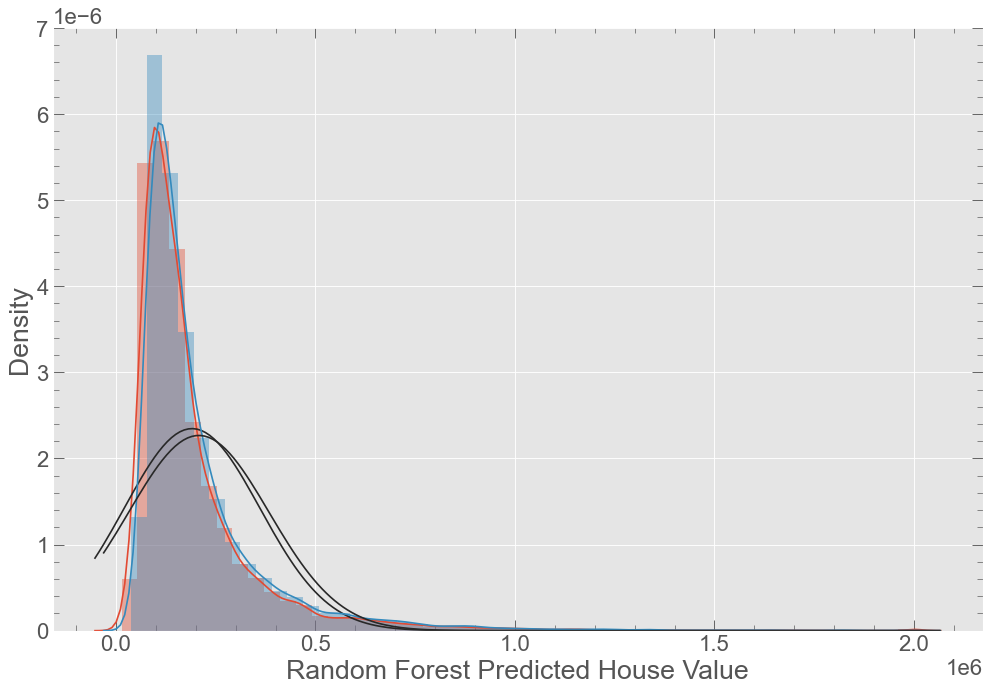

In [389]:
warnings.filterwarnings("ignore")
sns.distplot(house_value_2017['Actual House Value'], fit=stats.norm)
sns.distplot(house_value_2017['Random Forest Predicted House Value'], 
             fit=stats.norm)
plt.show()

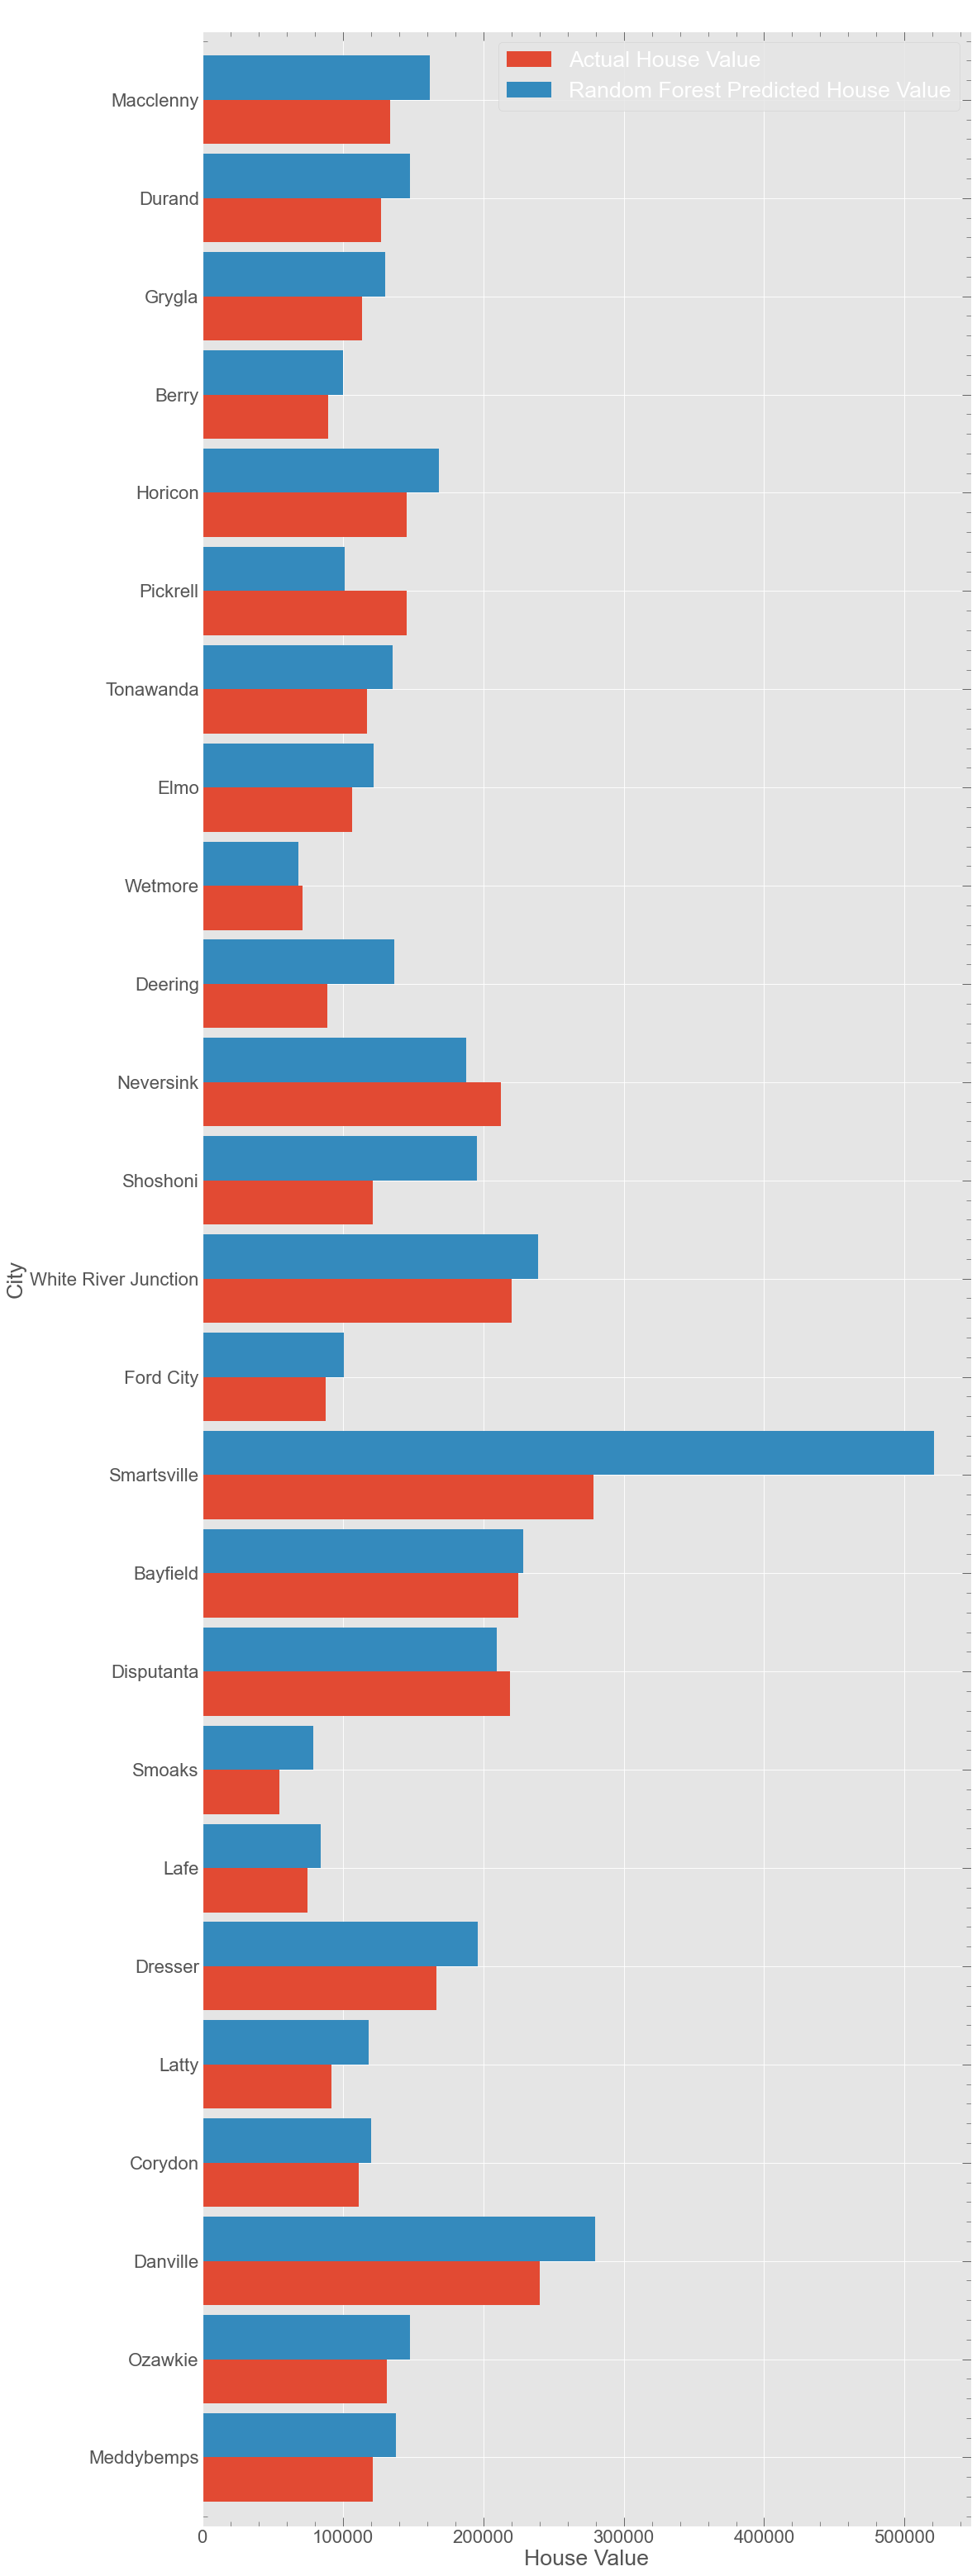

In [352]:
#grouing it by city and plotting bar plot
house=house_value_2017.reset_index()
house=house.groupby('City').mean()

#choosing only random 50 sample
house_sample=house.sample(n=25)
house_sample.plot(kind="barh",width=.9,figsize=(15,50))
plt.xlabel('House Value')
plt.title("Actual and Predicted house value using our best model")
plt.show()

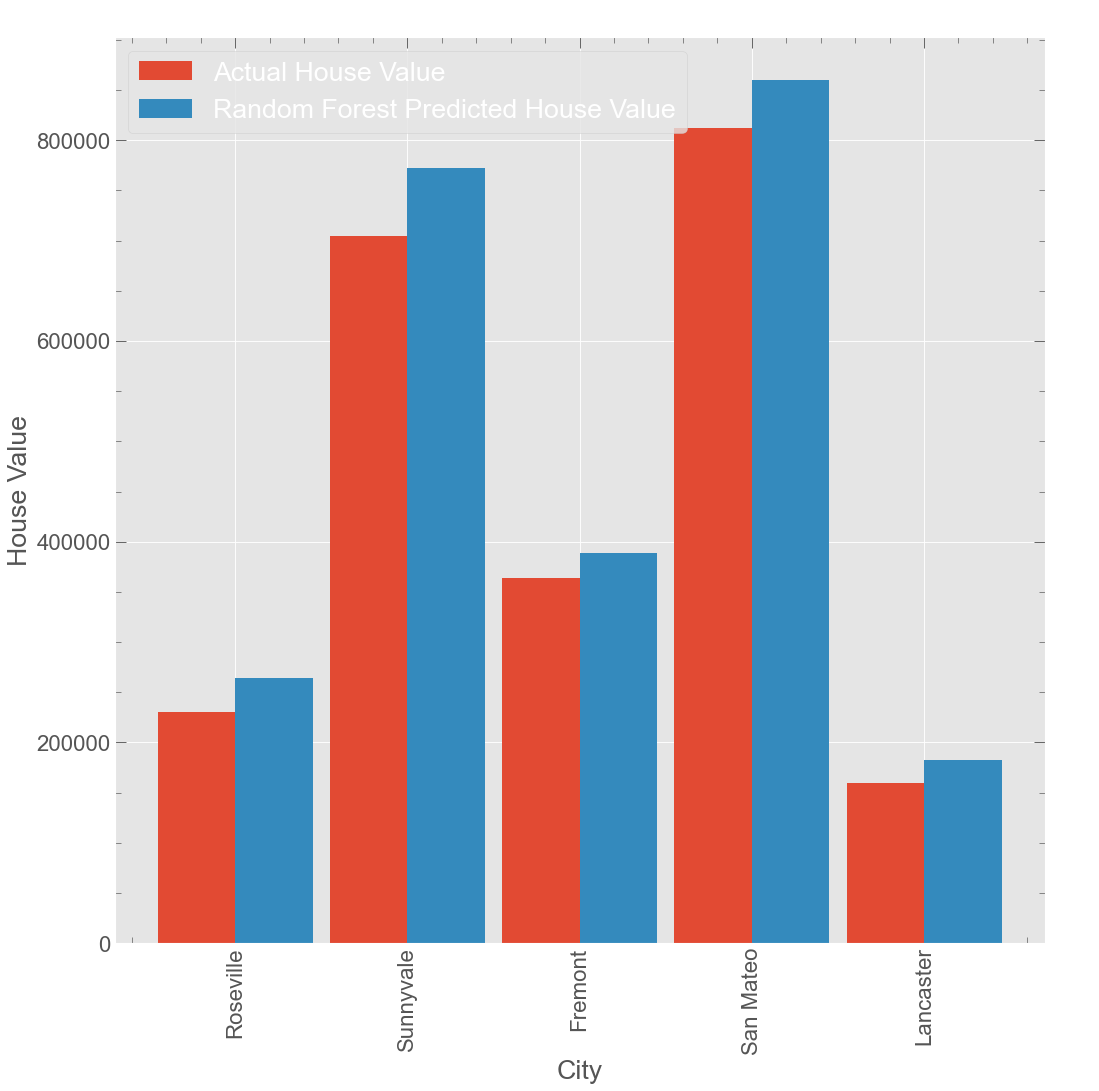

In [353]:
#predecting the 2017 best city house value
house_best=house.loc[['Roseville', 'Sunnyvale', 'Fremont', 'San Mateo', 'Lancaster'],:]
house_best.plot(kind="bar",width=.9,figsize=(15,15))
plt.ylabel('House Value')
plt.title("Actual and Predicted house value of 2017 best city using our best model")
plt.show()

## Conclusions

Our model suscefully predict the housing value of unseen data from 2017 Census with an prediction error of around $27,000